<a href="https://colab.research.google.com/github/finardi/tutos/blob/master/Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prepare environment

In [1]:
# https://downloads.apache.org/spark/
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://downloads.apache.org/spark/spark-2.4.7/spark-2.4.7-bin-hadoop2.7.tgz
!tar xf spark-2.4.7-bin-hadoop2.7.tgz

!pip install -q findspark
!pip install -q pyspark

     |████████████████████████████████| 204.2MB 60kB/s 
     |████████████████████████████████| 204kB 18.3MB/s 


In [2]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.7-bin-hadoop2.7"

import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

import numpy as np
import matplotlib.pyplot as plt

# 194 Imigration dataset 

In [32]:
# Reading the parquet files
path_imigration = '/content/drive/MyDrive/DataEngineer/final_project/sas_data/'
df_imigration = spark.read.parquet(path_imigration)

## Metadata


Column | Description 
--- | ---
`cicid`     | Unique ID for each record in the dataset
 `i94yr`    | year in 4 digit format
 `i94mon`   | month in numeric format
 `i94cit`   | code of soruce city in 3 digit format
 `i94res`   | code of source country in 3 digit format
 `i94port`  | port admitted through
 `arrdate`  | arrival date in the USA
 `i94mode`  | mode of transportation (1=Air; 2=Sea; 3=Land; 9=Not reported)
 `i94addr`  | state of arrival
 `depdate`  | departure date
 `i94bir`   | age of respondent in years
 `i94visa`  | visa codes in three categories: (1=Business; 2=Pleasure; 3=Student)
 `count`    | count for summary statistics
 `dtadfile` | character Date Field
 `visapost` | department of state where where visa was issued
 `occup`    | occupation that will be performed in U.S.
 `entdepa`  | arrival flag: admitted or paroled into the US
 `entdepd`  | departure flag:  lost visa or deceased
 `entdepu`  | update flag: update of visa, either apprehended, overstayed, or updated to PR
 `matflag`  | match flag
 `biryear`  | year of birth in 4 digit format
 `dtaddto`  | character date field to when admitted in the US
 `gender`   | gender
 `insnum`   | INS number
 `airline`  | airline used 
 `admnum`   | admission number
 `fltno`    | flight number of airline 
 `visatype` | 	class of admission in U.S.

In [33]:
# Print schema dataset
df_imigration.printSchema()

root
 |-- cicid: double (nullable = true)
 |-- i94yr: double (nullable = true)
 |-- i94mon: double (nullable = true)
 |-- i94cit: double (nullable = true)
 |-- i94res: double (nullable = true)
 |-- i94port: string (nullable = true)
 |-- arrdate: double (nullable = true)
 |-- i94mode: double (nullable = true)
 |-- i94addr: string (nullable = true)
 |-- depdate: double (nullable = true)
 |-- i94bir: double (nullable = true)
 |-- i94visa: double (nullable = true)
 |-- count: double (nullable = true)
 |-- dtadfile: string (nullable = true)
 |-- visapost: string (nullable = true)
 |-- occup: string (nullable = true)
 |-- entdepa: string (nullable = true)
 |-- entdepd: string (nullable = true)
 |-- entdepu: string (nullable = true)
 |-- matflag: string (nullable = true)
 |-- biryear: double (nullable = true)
 |-- dtaddto: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- insnum: string (nullable = true)
 |-- airline: string (nullable = true)
 |-- admnum: double (nullable = 

In [34]:
# Describe the dataset
df_imigration.describe().show()

+-------+------------------+-------+-------+------------------+------------------+-------+------------------+------------------+------------------+------------------+------------------+------------------+-------+-------------------+--------------------+-----+-------+-------+-------+-------+-----------------+------------------+-------+------------------+-----------------+--------------------+------------------+--------+
|summary|             cicid|  i94yr| i94mon|            i94cit|            i94res|i94port|           arrdate|           i94mode|           i94addr|           depdate|            i94bir|           i94visa|  count|           dtadfile|            visapost|occup|entdepa|entdepd|entdepu|matflag|          biryear|           dtaddto| gender|            insnum|          airline|              admnum|             fltno|visatype|
+-------+------------------+-------+-------+------------------+------------------+-------+------------------+------------------+------------------+-------

In [35]:
# # Count unique and NaN values in each column
# from pyspark.sql.functions import countDistinct, col, isnan, when, count

# len_df = df_imigration.count()
# cols_names = df_imigration.columns
# nuniques = df_imigration.agg(*(countDistinct(col(c)).alias(c) for c in df_imigration.columns)).rdd.flatMap(lambda x: x).collect()
# isnan_or_isnull = df_imigration.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df_imigration.columns]).rdd.flatMap(lambda x: x).collect()

for col, uniq, nan in zip (cols_names, nuniques, isnan_or_isnull):
    print(f'Column {col:<8} has {uniq:>7} unique values and {nan/len_df*100:<8.3}% NaN values')

Column cicid    has 1980548 unique values and 0.0     % NaN values
Column i94yr    has       1 unique values and 0.0     % NaN values
Column i94mon   has       1 unique values and 0.0     % NaN values
Column i94cit   has     225 unique values and 0.0     % NaN values
Column i94res   has     226 unique values and 0.0     % NaN values
Column i94port  has     161 unique values and 0.0     % NaN values
Column arrdate  has      22 unique values and 0.0     % NaN values
Column i94mode  has       3 unique values and 0.00424 % NaN values
Column i94addr  has     412 unique values and 3.36    % NaN values
Column depdate  has     186 unique values and 3.86    % NaN values
Column i94bir   has     101 unique values and 0.000808% NaN values
Column i94visa  has       3 unique values and 0.0     % NaN values
Column count    has       1 unique values and 0.0     % NaN values
Column dtadfile has      22 unique values and 5.05e-05% NaN values
Column visapost has     444 unique values and 60.3    % NaN va

In [36]:
df_imigration.show(5)

+--------+------+------+------+------+-------+-------+-------+-------+-------+------+-------+-----+--------+--------+-----+-------+-------+-------+-------+-------+--------+------+------+-------+---------------+-----+--------+
|   cicid| i94yr|i94mon|i94cit|i94res|i94port|arrdate|i94mode|i94addr|depdate|i94bir|i94visa|count|dtadfile|visapost|occup|entdepa|entdepd|entdepu|matflag|biryear| dtaddto|gender|insnum|airline|         admnum|fltno|visatype|
+--------+------+------+------+------+-------+-------+-------+-------+-------+------+-------+-----+--------+--------+-----+-------+-------+-------+-------+-------+--------+------+------+-------+---------------+-----+--------+
|459651.0|2016.0|   4.0| 135.0| 135.0|    ATL|20547.0|    1.0|     FL|20559.0|  54.0|    2.0|  1.0|20160403|    null| null|      O|      R|   null|      M| 1962.0|07012016|  null|  null|     VS|5.5556253633E10|00115|      WT|
|459652.0|2016.0|   4.0| 135.0| 135.0|    ATL|20547.0|    1.0|     FL|20555.0|  74.0|    2.0|  1

In [37]:
# Most of the people used air (i94mode = 1) as mode of travel. 
# There are ~17% (288136 cases) of people with no gender report 

df_imigration.groupby('i94mode', 'gender').count().show()

+-------+------+------+
|i94mode|gender| count|
+-------+------+------+
|    9.0|     X|    11|
|    1.0|     U|     5|
|   null|  null|    84|
|    9.0|     F|    92|
|    1.0|  null|288136|
|    1.0|     X|     4|
|    1.0|     F|804490|
|    9.0|     M|   157|
|    2.0|     F|  5093|
|    2.0|     M|  4830|
|    1.0|     M|877597|
|    2.0|  null|    21|
|    2.0|     U|     5|
|    2.0|     X|    20|
|    9.0|     U|     3|
+-------+------+------+



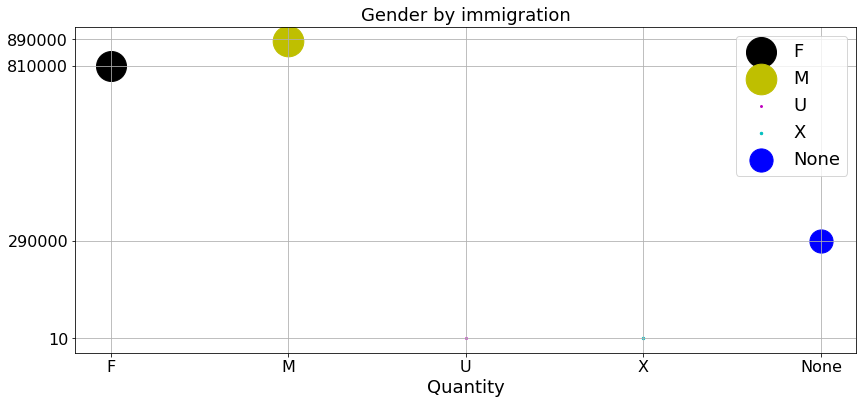

In [38]:
# According to the plot of this cell, more men immigrated

# Creating two lists to make scatter plot
mode = df_imigration.select('i94mode').rdd.flatMap(lambda x: x).collect()
gender = df_imigration.select('gender').rdd.flatMap(lambda x: x).collect()

# Getting the gender type
gender_type = df_imigration.groupby('gender').count() \
    .rdd \
    .map(lambda row: {row[0]: row[1]}) \
    .collect()

# Create a dict from gender_type
gender_dict = {}
for dict_item in gender_type:
    gender_dict.update(dict_item)
gender_dict['None'] = gender_dict.pop(None)

# Plot
colors = list("rgbcmyk")
plt.rcParams["figure.figsize"] = (14,6)
for k,v in gender_dict.items():
    x = k
    y = v
    plt.scatter(x, y, s=y/np.sqrt(y), color=colors.pop())

# Plot decoration
plt.grid()

plt.title('Gender by immigration', fontsize=18)
plt.xticks(fontsize=16)
plt.xlabel('Gender', fontsize=18)

plt.yticks([10, 290_000, 810_000, 890_000,], fontsize=16)
plt.xlabel('Quantity', fontsize=18)

plt.legend(gender_dict.keys(), fontsize=18)
plt.show()

In [39]:
# Type of Visa by gender
df_imigration.groupBy('i94visa', 'gender').count().show()

+-------+------+------+
|i94visa|gender| count|
+-------+------+------+
|    3.0|     M| 15996|
|    1.0|  null| 84345|
|    1.0|     X|     4|
|    1.0|     F| 66051|
|    3.0|     F| 14549|
|    2.0|     F|729075|
|    2.0|     M|642754|
|    1.0|     M|223834|
|    3.0|  null|     3|
|    2.0|  null|203893|
|    2.0|     U|    13|
|    2.0|     X|    31|
+-------+------+------+



# Airport dataset

In [40]:
airport_path = '/content/drive/MyDrive/DataEngineer/final_project/Airport_Codes/airport-codes_csv.csv'
df_airport = spark.read.csv(airport_path, header=True)

## Metadata

 Column | Description 
--- | ---
`ident`         | Unique ID 
 `type`         | type of the airport
 `name`         | airport name
 `elevation_ft` | altitude of the airport
 `continent`    | continent
 `iso_country`  | ISO code of the country of the airport
 `iso_region`   | ISO code for the region of the airport
 `municipality` | city where the airport is located
 `gps_code`     | GPS code of the airport
 `iata_code`    | IATA code of the airport
 `local_code`   | çocal code of the airport
 `coordinates`  | GPS coordinates of the airport

In [41]:
# Print schema dataset
df_airport.printSchema()

root
 |-- ident: string (nullable = true)
 |-- type: string (nullable = true)
 |-- name: string (nullable = true)
 |-- elevation_ft: string (nullable = true)
 |-- continent: string (nullable = true)
 |-- iso_country: string (nullable = true)
 |-- iso_region: string (nullable = true)
 |-- municipality: string (nullable = true)
 |-- gps_code: string (nullable = true)
 |-- iata_code: string (nullable = true)
 |-- local_code: string (nullable = true)
 |-- coordinates: string (nullable = true)



In [42]:
# Describe the dataset
df_airport.describe().show()

+-------+--------------------+-------------+--------------------+------------------+---------+-----------+----------+---------------+--------------------+---------+-------------------+--------------------+
|summary|               ident|         type|                name|      elevation_ft|continent|iso_country|iso_region|   municipality|            gps_code|iata_code|         local_code|         coordinates|
+-------+--------------------+-------------+--------------------+------------------+---------+-----------+----------+---------------+--------------------+---------+-------------------+--------------------+
|  count|               55075|        55075|               55075|             48069|    55075|      55075|     55075|          49399|               41030|     9189|              28686|               55075|
|   mean|2.3873375337777779E8|         null|                null|1240.7896773388254|     null|       null|      null|           null|2.1920446610204083E8|      0.0|8.5805561785

In [43]:
# Count unique and NaN values in each column
from pyspark.sql.functions import countDistinct, col, isnan, when, count

len_df = df_airport.count()
cols_names = df_airport.columns
nuniques = df_airport.agg(*(countDistinct(col(c)).alias(c) for c in df_airport.columns)).rdd.flatMap(lambda x: x).collect()
isnan_or_isnull = df_airport.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df_airport.columns]).rdd.flatMap(lambda x: x).collect()

for col, uniq, nan in zip (cols_names, nuniques, isnan_or_isnull):
    print(f'Column {col:<12} has {uniq:>7} unique values and {nan/len_df*100:<4.3}% NaN values')

Column ident        has   55075 unique values and 0.0 % NaN values
Column type         has       7 unique values and 0.0 % NaN values
Column name         has   52144 unique values and 0.0 % NaN values
Column elevation_ft has    5449 unique values and 12.7% NaN values
Column continent    has       7 unique values and 0.0 % NaN values
Column iso_country  has     244 unique values and 0.0 % NaN values
Column iso_region   has    2810 unique values and 0.0 % NaN values
Column municipality has   27133 unique values and 10.3% NaN values
Column gps_code     has   40850 unique values and 25.5% NaN values
Column iata_code    has    9042 unique values and 83.3% NaN values
Column local_code   has   27436 unique values and 47.9% NaN values
Column coordinates  has   54874 unique values and 0.0 % NaN values


In [44]:
df_airport.show(5)

+-----+-------------+--------------------+------------+---------+-----------+----------+------------+--------+---------+----------+--------------------+
|ident|         type|                name|elevation_ft|continent|iso_country|iso_region|municipality|gps_code|iata_code|local_code|         coordinates|
+-----+-------------+--------------------+------------+---------+-----------+----------+------------+--------+---------+----------+--------------------+
|  00A|     heliport|   Total Rf Heliport|          11|       NA|         US|     US-PA|    Bensalem|     00A|     null|       00A|-74.9336013793945...|
| 00AA|small_airport|Aero B Ranch Airport|        3435|       NA|         US|     US-KS|       Leoti|    00AA|     null|      00AA|-101.473911, 38.7...|
| 00AK|small_airport|        Lowell Field|         450|       NA|         US|     US-AK|Anchor Point|    00AK|     null|      00AK|-151.695999146, 5...|
| 00AL|small_airport|        Epps Airpark|         820|       NA|         US|     

# US - cities demographics dataset

In [55]:
uc_cities_demographics = '/content/drive/MyDrive/DataEngineer/final_project/US_Cities_Demographics/us-cities-demographics.csv'
df_demographics = spark.read.csv(uc_cities_demographics, header=True, sep=';')

## Metadata

Column | Description 
--- | ---
`city`         | name of the city
`state`        | US state of the city
`median age`   | the median of the age of the population
`male population`   | number of the male population
`female population` | number of the female population
`total population`   | number of the total population
`number of veterans` | number of veterans living in the city
`foreign-born` |  number of residents of the city that were not born in the city
`state code` | code of the state of the city
`race` | race class
`count` | number of individual of each race




In [56]:
# Print schema dataset
df_demographics.printSchema()

root
 |-- City: string (nullable = true)
 |-- State: string (nullable = true)
 |-- Median Age: string (nullable = true)
 |-- Male Population: string (nullable = true)
 |-- Female Population: string (nullable = true)
 |-- Total Population: string (nullable = true)
 |-- Number of Veterans: string (nullable = true)
 |-- Foreign-born: string (nullable = true)
 |-- Average Household Size: string (nullable = true)
 |-- State Code: string (nullable = true)
 |-- Race: string (nullable = true)
 |-- Count: string (nullable = true)



In [57]:
# Describe the dataset
df_demographics.describe().show()

+-------+-------+---------+-----------------+------------------+------------------+------------------+------------------+------------------+----------------------+----------+--------------------+------------------+
|summary|   City|    State|       Median Age|   Male Population| Female Population|  Total Population|Number of Veterans|      Foreign-born|Average Household Size|State Code|                Race|             Count|
+-------+-------+---------+-----------------+------------------+------------------+------------------+------------------+------------------+----------------------+----------+--------------------+------------------+
|  count|   2891|     2891|             2891|              2888|              2888|              2891|              2878|              2878|                  2875|      2891|                2891|              2891|
|   mean|   null|     null|35.49488066413016| 97328.42624653739|101769.63088642659|198966.77931511588| 9367.832522585128|40653.598679638635|

In [67]:
# Count unique and NaN values in each column
from pyspark.sql.functions import countDistinct, col, isnan, when, count

len_df = df_demographics.count()
cols_names = df_demographics.columns
nuniques = df_demographics.agg(*(countDistinct(col(c)).alias(c) for c in df_demographics.columns)).rdd.flatMap(lambda x: x).collect()
isnan_or_isnull = df_demographics.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df_demographics.columns]).rdd.flatMap(lambda x: x).collect()

for col, uniq, nan in zip (cols_names, nuniques, isnan_or_isnull):
    print(f'Column {col:<22} has {uniq:>4} unique values and {nan/len_df*100:<5.3}% NaN values')

Column City                   has  567 unique values and 0.0  % NaN values
Column State                  has   49 unique values and 0.0  % NaN values
Column Median Age             has  180 unique values and 0.0  % NaN values
Column Male Population        has  593 unique values and 0.104% NaN values
Column Female Population      has  594 unique values and 0.104% NaN values
Column Total Population       has  594 unique values and 0.0  % NaN values
Column Number of Veterans     has  577 unique values and 0.45 % NaN values
Column Foreign-born           has  587 unique values and 0.45 % NaN values
Column Average Household Size has  161 unique values and 0.553% NaN values
Column State Code             has   49 unique values and 0.0  % NaN values
Column Race                   has    5 unique values and 0.0  % NaN values
Column Count                  has 2785 unique values and 0.0  % NaN values


In [68]:
df_demographics.show(5)

+----------------+-------------+----------+---------------+-----------------+----------------+------------------+------------+----------------------+----------+--------------------+-----+
|            City|        State|Median Age|Male Population|Female Population|Total Population|Number of Veterans|Foreign-born|Average Household Size|State Code|                Race|Count|
+----------------+-------------+----------+---------------+-----------------+----------------+------------------+------------+----------------------+----------+--------------------+-----+
|   Silver Spring|     Maryland|      33.8|          40601|            41862|           82463|              1562|       30908|                   2.6|        MD|  Hispanic or Latino|25924|
|          Quincy|Massachusetts|      41.0|          44129|            49500|           93629|              4147|       32935|                  2.39|        MA|               White|58723|
|          Hoover|      Alabama|      38.5|          38040| 

# Temperature dataset

In [77]:
temperature_path = '/content/drive/MyDrive/DataEngineer/final_project/Climate_Change/GlobalLandTemperaturesByCity.csv'
df_temperature = spark.read.csv(temperature_path, header=True)

## Metadata



Column | Description 
--- | ---
`dt` | date in format YYYY-MM-DD
`average temperature` | average temperature of the city in a given date
`city` | city name
`country`	| country name
`latitude` |	latitude
`longitude` |	longitude


In [79]:
# Print schema dataset
df_temperature.printSchema()

root
 |-- dt: string (nullable = true)
 |-- AverageTemperature: string (nullable = true)
 |-- AverageTemperatureUncertainty: string (nullable = true)
 |-- City: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)



In [ ]:
# Describe the dataset
df_temperature.describe().show()

In [75]:
# Count unique and NaN values in each column
from pyspark.sql.functions import countDistinct, col, isnan, when, count

len_df = df_temperature.count()
cols_names = df_temperature.columns
nuniques = df_temperature.agg(*(countDistinct(col(c)).alias(c) for c in df_temperature.columns)).rdd.flatMap(lambda x: x).collect()
isnan_or_isnull = df_temperature.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df_temperature.columns]).rdd.flatMap(lambda x: x).collect()

for col, uniq, nan in zip (cols_names, nuniques, isnan_or_isnull):
    print(f'Column {col:<29} has {uniq:>6} unique values and {nan/len_df*100:<4.3}% NaN values')

Column dt                            has   3239 unique values and 0.0 % NaN values
Column AverageTemperature            has 113163 unique values and 4.23% NaN values
Column AverageTemperatureUncertainty has  10902 unique values and 4.23% NaN values
Column City                          has   3448 unique values and 0.0 % NaN values
Column Country                       has    159 unique values and 0.0 % NaN values
Column Latitude                      has     73 unique values and 0.0 % NaN values
Column Longitude                     has   1227 unique values and 0.0 % NaN values


In [76]:
df_temperature.show(5)

+----------+------------------+-----------------------------+-----+-------+--------+---------+
|        dt|AverageTemperature|AverageTemperatureUncertainty| City|Country|Latitude|Longitude|
+----------+------------------+-----------------------------+-----+-------+--------+---------+
|1743-11-01|             6.068|           1.7369999999999999|Århus|Denmark|  57.05N|   10.33E|
|1743-12-01|              null|                         null|Århus|Denmark|  57.05N|   10.33E|
|1744-01-01|              null|                         null|Århus|Denmark|  57.05N|   10.33E|
|1744-02-01|              null|                         null|Århus|Denmark|  57.05N|   10.33E|
|1744-03-01|              null|                         null|Århus|Denmark|  57.05N|   10.33E|
+----------+------------------+-----------------------------+-----+-------+--------+---------+
only showing top 5 rows

